<a href="https://colab.research.google.com/github/AmirrezaJalili/Face_mask_usage/blob/main/Face_Mask_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask Usage 🤒😷😶

## Importing necessary tools

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import pandas as pd
import os
from matplotlib import pyplot as plt
import random
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras import callbacks
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1)

## Unzipping data
unzipping the data downloaded from:

https://www.kaggle.com/datasets/jamesnogra/face-mask-usage

(this cell will run once and after that I will put it as a comment)

In [2]:
# !unzip "drive/MyDrive/deep learning/zip files/archive.zip" -d "drive/MyDrive/deep learning/data"

## walk trough dataset

In [3]:
wdir = "drive/MyDrive/deep learning/data/Face mask usage"
unique_labels = []
for dirpath, dirnames, filenames in os.walk(wdir):
  dirfolder = dirpath.split("/")[-1]
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirfolder}'")
unique_labels = list(os.listdir(wdir))
print(f"unique labels are:{unique_labels}")

there are 4 directories and 0 images in 'Face mask usage'
there are 0 directories and 1451 images in 'fully_covered'
there are 0 directories and 3664 images in 'not_covered'
there are 0 directories and 1114 images in 'not_face'
there are 0 directories and 392 images in 'partially_covered'
unique labels are:['fully_covered', 'not_covered', 'not_face', 'partially_covered']


## visualizing some images from each class...

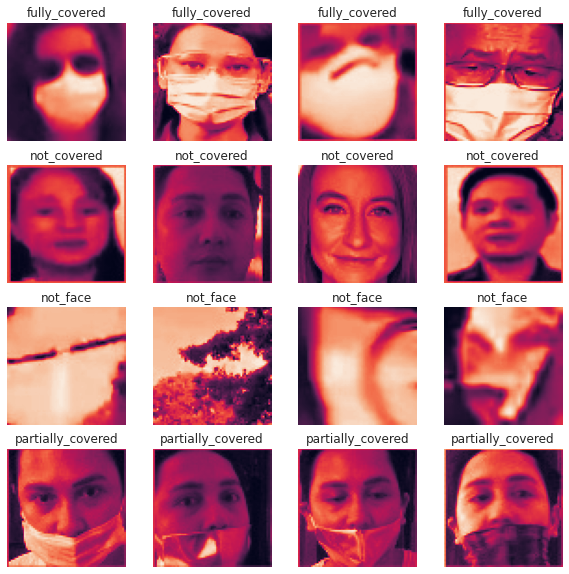

In [4]:
fig = plt.figure(figsize=(10, 10))
j = 0
for Class in os.listdir(wdir):
  image_class_path = os.path.join(wdir,Class)
  random_selected_images = random.choices(os.listdir(os.path.join(wdir, Class)), k=4)
  
  for i in range(4):
    ax = plt.subplot(4, 4, i + j + 1)
    img = plt.imread(os.path.join(image_class_path, random_selected_images[i]))
    plt.imshow(img)
    plt.title(Class)
    plt.axis("off")
  j += 4

## preprocessing data
1.   open images from directory
2.   resize images
3.   convert images and labels to np array...
4.   and save them in a numpy array(X and y)

In [5]:
img_height, img_width = 64, 64 
X = []
y = []
for index, Class in enumerate(os.listdir(wdir)):
  for item in os.listdir(os.path.join(wdir, Class)):
    img = Image.open(os.path.join(wdir, Class, item)).convert("RGB")
    img.resize((img_height, img_width))
    X.append(np.asarray(img))
    y.append(index)

In [6]:
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

((6621, 64, 64, 3), (6621,))

normalizing train data

In [7]:
#normalizing train data
X = X.astype("float32")
X = X/255
X.shape

(6621, 64, 64, 3)

In [8]:
#Binarizing y
lb = LabelBinarizer()
y = lb.fit_transform(y)
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

## split data to:
train_data(70%) 
valid_data(21%)
test_data(9%)

In [9]:
X_train, X_30_percent, y_train, y_30_percent = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_30_percent,
                                                y_30_percent,
                                                test_size=0.3,
                                                random_state=42)
print(f"X_train: {len(X_train)}\ty_train: {len(y_train)}\nX_val: {len(X_val)}\ty_val: {len(y_val)}\nX_test: {len(X_test)}\ty_test: {len(y_test)}")

X_train: 5296	y_train: 5296
X_val: 927	y_val: 927
X_test: 398	y_test: 398


## Early Stopping
this function will Stop training when a monitored metric has stopped improving

In [10]:
early_stopping = callbacks.EarlyStopping(monitor="val_categorical_accuracy",
                                         min_delta=0.001,
                                         patience=3,
                                         mode='auto',
                                         verbose=2,
                                         baseline=None,
                                         restore_best_weights=True)

## Creating our CNN model and train it with 70% of data




In [11]:
def create_model():
  model = keras.Sequential([
                                keras.layers.Conv2D(128, (3, 3),  activation="relu", input_shape=(64, 64, 3)),
                                keras.layers.MaxPooling2D(padding="same"),
                                keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                keras.layers.MaxPooling2D(),
                                keras.layers.Conv2D(128, (3,3), activation="relu"),
                                keras.layers.Flatten(),
                                keras.layers.Dense(128, activation="relu"),
                                keras.layers.Dense(4, activation="softmax")
  ])
  model.compile(
      optimizer="Adam",
      loss=keras.losses.categorical_crossentropy,
      metrics=[keras.metrics.categorical_accuracy])
  return model

In [12]:
CNN_model = create_model()

history = CNN_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        shuffle=True,
                        callbacks=[early_stopping],
                        batch_size=32,
                        epochs=20)

Epoch 1/20
166/166 [==============================] - 16s 41ms/step - loss: 0.5736 - categorical_accuracy: 0.7804 - val_loss: 0.2796 - val_categorical_accuracy: 0.9126
Epoch 2/20
166/166 [==============================] - 6s 39ms/step - loss: 0.2152 - categorical_accuracy: 0.9320 - val_loss: 0.1882 - val_categorical_accuracy: 0.9320
Epoch 3/20
166/166 [==============================] - 6s 37ms/step - loss: 0.1249 - categorical_accuracy: 0.9581 - val_loss: 0.1504 - val_categorical_accuracy: 0.9536
Epoch 4/20
166/166 [==============================] - 6s 37ms/step - loss: 0.1011 - categorical_accuracy: 0.9681 - val_loss: 0.1642 - val_categorical_accuracy: 0.9482
Epoch 5/20
166/166 [==============================] - 6s 39ms/step - loss: 0.0815 - categorical_accuracy: 0.9728 - val_loss: 0.1183 - val_categorical_accuracy: 0.9601
Epoch 6/20
166/166 [==============================] - 6s 38ms/step - loss: 0.0500 - categorical_accuracy: 0.9826 - val_loss: 0.1511 - val_categorical_accuracy: 0.95

its looks like our Early Stopping stoped the model training befor it train for 20 epochs

In [13]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 18432)             0

## Visualizing model accuracy and loss

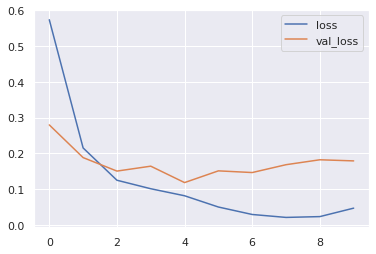

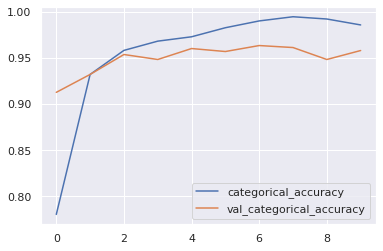

In [14]:
frame_data = pd.DataFrame(history.history)
frame_data.loc[:, ["loss","val_loss"]].plot()
frame_data.loc[:, ["categorical_accuracy", "val_categorical_accuracy"]].plot();


## Convert predictions to labels...

In [15]:
y_pred = CNN_model.predict(X_test)
y_pred = np.array([unique_labels[np.argmax(x)] for x in y_pred])
y_pred[:10]

array(['fully_covered', 'not_face', 'not_covered', 'not_covered',
       'not_covered', 'not_face', 'not_covered', 'fully_covered',
       'fully_covered', 'not_face'], dtype='<U17')

In [16]:
y_test = np.array([unique_labels[np.argmax(x)] for x in y_test])
y_test[:10]

array(['fully_covered', 'not_face', 'not_covered', 'not_covered',
       'not_covered', 'not_face', 'not_covered', 'fully_covered',
       'fully_covered', 'not_face'], dtype='<U17')

## visualize confusion matrix

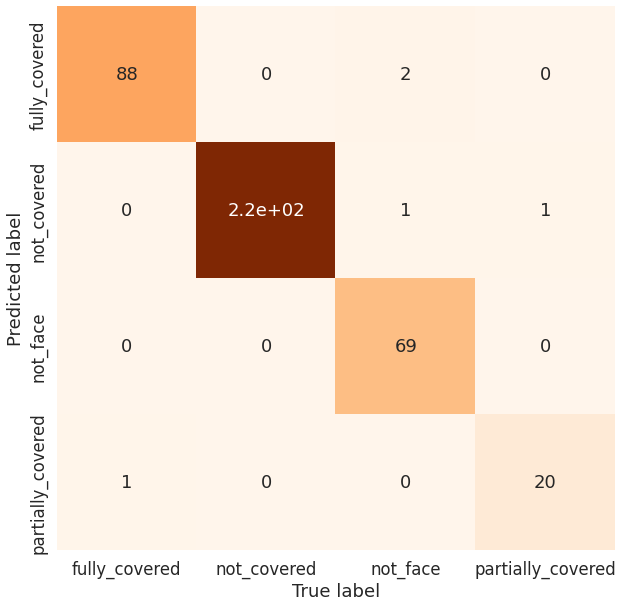

In [17]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="Oranges")
plt.xlabel("True label")
plt.ylabel("Predicted label")
ax.xaxis.set_ticklabels(unique_labels)
ax.yaxis.set_ticklabels(unique_labels);

## And now we train our model on all of the training data and save the model

### craete model

In [18]:
final_CNN_model = create_model()
history = final_CNN_model.fit(X_train, y_train,
                        shuffle=True,
                        batch_size=32,
                        epochs=8)

Epoch 1/8
166/166 [==============================] - 6s 35ms/step - loss: 0.6288 - categorical_accuracy: 0.7583
Epoch 2/8
166/166 [==============================] - 6s 35ms/step - loss: 0.2211 - categorical_accuracy: 0.9248
Epoch 3/8
166/166 [==============================] - 6s 35ms/step - loss: 0.1547 - categorical_accuracy: 0.9454
Epoch 4/8
166/166 [==============================] - 6s 35ms/step - loss: 0.1184 - categorical_accuracy: 0.9600
Epoch 5/8
166/166 [==============================] - 6s 34ms/step - loss: 0.0744 - categorical_accuracy: 0.9736
Epoch 6/8
166/166 [==============================] - 6s 35ms/step - loss: 0.0537 - categorical_accuracy: 0.9832
Epoch 7/8
166/166 [==============================] - 6s 35ms/step - loss: 0.0408 - categorical_accuracy: 0.9873
Epoch 8/8
166/166 [==============================] - 6s 35ms/step - loss: 0.0455 - categorical_accuracy: 0.9849


### save model

In [19]:
final_CNN_model.save("drive/MyDrive/deep learning/models/Face mask usage", )

INFO:tensorflow:Assets written to: drive/MyDrive/deep learning/models/Face mask usage/assets
